### HEAT MAP ANALYSIS MAP


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi



In [11]:
# Get grenades data

grenades_data = pd.read_csv('mm_grenades_demos.csv')

# get nome das colunas do dataframe
grenades_data.columns





Index(['Unnamed: 0', 'file', 'map', 'round', 'start_seconds', 'seconds',
       'end_seconds', 'att_team', 'vic_team', 'att_id', 'vic_id', 'att_side',
       'vic_side', 'hp_dmg', 'arm_dmg', 'is_bomb_planted', 'bomb_site',
       'hitbox', 'nade', 'winner_team', 'winner_side', 'att_rank', 'vic_rank',
       'att_pos_x', 'att_pos_y', 'nade_land_x', 'nade_land_y', 'vic_pos_x',
       'vic_pos_y', 'round_type', 'ct_eq_val', 't_eq_val', 'avg_match_rank'],
      dtype='object')

In [19]:
# Get grenades name, grenades bought, and grenades thrown
grenades_name = grenades_data['nade']
round_type = grenades_data['round_type']
damage = grenades_data['hp_dmg']

import pandas as pd
import plotly.express as px

def count_grenade_usage(dataframe, map_name, round_type):
    """
    Conta o número de granadas usadas por tipo para um mapa e tipo de ronda específicos.

    Retorna um DataFrame com colunas ['nade', 'count'].
    """
    valid_maps = ['de_mirage', 'de_dust2', 'de_cache', 'de_inferno', 'de_overpass', 'de_train']
    
    if map_name not in valid_maps:
        raise ValueError(f"Mapa '{map_name}' não está na lista de mapas válidos.")

    # Filtrar dados conforme mapa e tipo de ronda
    filtered = dataframe[
        (dataframe['map'] == map_name) &
        (dataframe['round_type'] == round_type)
    ]
    
    if filtered.empty:
        raise ValueError(f"Nenhum dado encontrado para o mapa '{map_name}' com ronda '{round_type}'.")

    # Agrupar e contar por tipo de granada
    grouped = filtered.groupby('nade').size().reset_index(name='count')
    return grouped


import plotly.express as px

def plot_grenade_usage(count_df, map_name, round_type):
    """
    Gera um gráfico de pizza com os dados de uso de granadas.
    
    Parâmetros:
    - count_df: DataFrame com colunas ['nade', 'count']
    - map_name: str
    - round_type: str
    """
    fig = px.pie(
        count_df,
        names='nade',
        values='count',
        title=f'Granadas Usadas - Mapa: {map_name} | Tipo de Ronda: {round_type}',
        hole=0.4
    )
    fig.show()


# Exemplo de uso
map_name = 'de_mirage'
round_type = 'PISTOL_ROUND'
# Contar uso de granadas
count_df = count_grenade_usage(grenades_data, map_name, round_type)
print (count_df)


         nade  count
0       Decoy    753
1       Flash    317
2          HE    517
3  Incendiary    186
4     Molotov     15
5       Smoke    370


In [14]:
print("Número de rondas totais: %i" % df.groupby(['file', 'round'])['tick'].first().count())

Número de rondas totais: 31532


# Pistol Round Buys

Começar por analisar apenas as pistol rounds e contar o numero de rondas deste género

In [15]:
avail_pistols = ['USP', 'Glock', 'P2000', 'P250', 'Tec9', 'FiveSeven', 'Deagle', 'DualBarettas', 'CZ']

df_pistol = df[(df['round'].isin([1,16])) & (df['wp'].isin(avail_pistols))]
print("Total Number of Pistol Rounds: %i" % df_pistol.groupby(['file', 'round'])['tick'].first().count())

Total Number of Pistol Rounds: 2470


 Comecemos por analisar o tipo de ronda "pistol buys". Isto é determinado pelos danos causados pelas pistolas em cada ronda. Existe aqui uma tendência para que, se causaste 0 danos com a pistola que tinhas, ela não seja contabilizada. 
 O potencial viés é que a pontaria fará com que a maioria das armas seja subestimada, mas não creio que seja um grande problema.

In [16]:
pistol_buys = df_pistol.groupby(['file', 'round', 'att_side', 'wp'])['hp_dmg'].first()
(pistol_buys.groupby(['wp']).count()/pistol_buys.groupby(['wp']).count().sum())*100.

wp
CZ               1.915270
Deagle           4.517539
DualBarettas     1.519725
FiveSeven        5.423129
Glock           26.626418
P2000           11.731029
P250             9.763714
Tec9             5.090039
USP             33.413136
Name: hp_dmg, dtype: float64

Parece que a Glock/USP supera a maioria das pistolas.

## Heatmaps of Frequency of Pistol Damage

Text(0.5, 1.0, 'Counter-Terrorists Attacking')

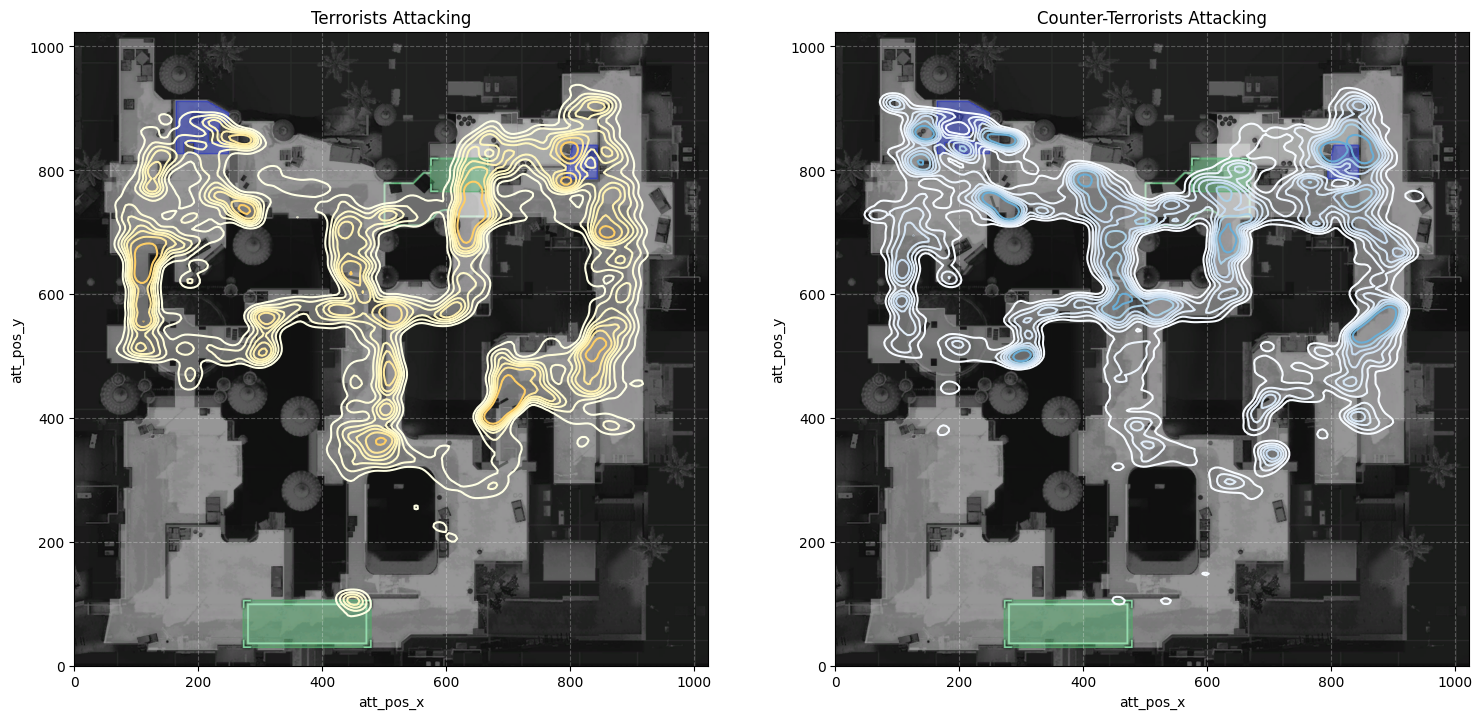

In [53]:

from cv2 import imread
from matplotlib import pyplot as plt
import seaborn as sns


smap = 'de_dust2'

bg = imread(smap+'.png')
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,16))
ax1.grid(visible=True, which='major', color='w', linestyle='--', alpha=0.25)
ax2.grid(visible=True, which='major', color='w', linestyle='--', alpha=0.25)
ax1.imshow(bg, zorder=0, extent=[0.0, 1024, 0., 1024])
ax2.imshow(bg, zorder=0, extent=[0.0, 1024, 0., 1024])
plt.xlim(0,1024)
plt.ylim(0,1024)

plot_df = df_pistol.loc[(df_pistol['map'] == smap) & (df_pistol['att_side'] == 'Terrorist')]
sns.kdeplot(x=plot_df['att_pos_x'], y=plot_df['att_pos_y'], cmap='YlOrBr',bw_method= 0.05, thresh=0.1, levels=8, ax=ax1)
ax1.set_title('Terrorists Attacking')

plot_df = df_pistol.loc[(df_pistol['map'] == smap) & (df_pistol['att_side'] == 'CounterTerrorist')]
sns.kdeplot(x=plot_df['att_pos_x'], y=plot_df['att_pos_y'], cmap='Blues', bw_method= 0.05,  thresh=0.1, levels=8, ax=ax2)
ax2.set_title('Counter-Terrorists Attacking')

### ADR by Pistols

De seguida, vamos ver o dano médio por ronda causado por um jogador com a sua pistola. Se o jogador tiver apanhado uma pistola durante a ronda, esta é contabilizada separadamente. 
No entanto, como a maioria das mortes com pistola são tiros na cabeça, isso não deve distorcer muito a estatística (especialmente para USPS).

In [60]:
df_pistol.groupby(['file', 'round', 'wp', 'att_id'])['hp_dmg'].sum().groupby('wp').agg(['count', 'mean']).sort_values(by='mean')

,count,mean
wp,,
Tec9,586,87.288396
CZ,199,90.592965
P250,1058,90.811909
FiveSeven,612,91.942810
DualBarettas,158,93.348101
Glock,7591,94.766566
P2000,1371,98.170678
USP,8118,98.827544
Deagle,471,100.252654


Deagle has a massive advantage in damage

## Bomb Site Plants
Vejamos agora o Número de plantas-bomba por local. Esta estatística indica-nos as preferências do T para decidir qual o local a tomar durante a ronda. Embora a possibilidade de rotações esteja sempre presente, dá-nos uma boa ideia do que esperar.

In [61]:
df_pistol[~df_pistol['bomb_site'].isnull()].groupby(['file', 'map', 'round', 'bomb_site'])['tick'] \
        .first().groupby(['map', 'bomb_site']).count().unstack('bomb_site')

bomb_site,A,B
map,,
de_cache,158,133
de_cbble,32,39
de_dust2,186,134
de_inferno,105,79
de_mirage,180,263
de_overpass,27,55
de_train,20,33



## Post-plant Win Probabilities by Advantages

Esta poderia ser mais divulgada, mas queremos ser capazes de analisar as probabilidades de vitória pós-planta, tendo em conta o contexto de quantos Ts e CTs estão vivos nessa altura. Primeiro, podemos olhar para a estatística geral:

In [69]:
bomb_prob_overall = df_pistol[~df_pistol['bomb_site'].isnull()].groupby(['file', 'round', 'map', 'bomb_site', 'winner_side'])['tick'].first().groupby(['map', 'bomb_site', 'winner_side']).count()
bomb_prob_overall_pct = bomb_prob_overall.groupby(level=[0,1]).apply(lambda x: 100 * x / float(x.sum()))
bomb_prob_overall_pct = bomb_prob_overall_pct.reset_index()  # Reset the index to avoid duplicate column names
bomb_prob_overall_pct.pivot(index=['map', 'bomb_site'], columns='winner_side', values=0)  # Pivot the data for better readability

ValueError: cannot insert bomb_site, already exists